## Getting data

In [1]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the base directory
base_dir = r'/content/drive/MyDrive/csv'

# Define the structure and mapping of files to patient IDs
chum_files = {
    os.path.join("landmarks", "chum", "landmark_distances_mm_1.csv"): 1,
    os.path.join("landmarks", "chum", "landmark_distances_mm_3.csv"): 3,
    os.path.join("landmarks", "chum", "landmark_distances_mm_4.csv"): 4,
    os.path.join("landmarks", "chum", "landmark_distances_mm_5.csv"): 5,
    os.path.join("landmarks", "chum", "landmark_distances_mm_6.csv"): 6,
    os.path.join("landmarks", "chum", "landmark_distances_mm_7.csv"): 7,
    os.path.join("landmarks", "chum", "landmark_distances_mm_8.csv"): 8,
    os.path.join("landmarks", "chum", "landmark_distances_mm_11.csv"): 11,
    os.path.join("landmarks", "chum", "landmark_distances_mm_13.csv"): 13,
    os.path.join("landmarks", "chum", "landmark_distances_mm_14.csv"): 14,
    os.path.join("landmarks", "chum", "HN-CHUM-061.csv"): 61,
    os.path.join("landmarks", "chum", "HN-CHUM-063.csv"): 63,
    os.path.join("landmarks", "chum", "HN-CHUM-064.csv"): 64
}

chus_files = {
    os.path.join("landmarks", "chus", "HNCHUS001_distances.csv"): 1,
    os.path.join("landmarks", "chus", "HNCHUS002_distances.csv"): 2,
    os.path.join("landmarks", "chus", "HNCHUS003_distances.csv"): 3,
    os.path.join("landmarks", "chus", "HNCHUS004_distances.csv"): 4,
    os.path.join("landmarks", "chus", "HNCHUS005_distances.csv"): 5
}

hgj_files = {
    os.path.join("landmarks", "hgj", "HN-HGJ-005.csv"): 5,
    os.path.join("landmarks", "hgj", "HN-HGJ-006.csv"): 6,
    os.path.join("landmarks", "hgj", "HN-HGJ-008.csv"): 8,
    os.path.join("landmarks", "hgj", "HN-HGJ-009.csv"): 9,
    os.path.join("landmarks", "hgj", "HN-HGJ-012.csv"): 12,
    os.path.join("landmarks", "hgj", "HN-HGJ-091.csv"): 91
}

hmr_files = {
    os.path.join("landmarks", "hmr", "hmr_001_landmark.csv"): 1,
    os.path.join("landmarks", "hmr", "hmr_002_landmark.csv"): 2,
    os.path.join("landmarks", "hmr", "hmr_003_landmark.csv"): 3,
    os.path.join("landmarks", "hmr", "hmr_004_landmark.csv"): 4,
    os.path.join("landmarks", "hmr", "hmr_005_landmark.csv"): 5,
    os.path.join("landmarks", "hmr", "hmr_006_landmark.csv"): 6,
    os.path.join("landmarks", "hmr", "hmr_007_landmark.csv"): 7,
    os.path.join("landmarks", "hmr", "hmr_008_landmark.csv"): 8,
    os.path.join("landmarks", "hmr", "hmr_019_landmark.csv"): 19,
    os.path.join("landmarks", "hmr", "hmr_027_landmark.csv"): 27,
    os.path.join("landmarks", "hmr", "HN-HRM-041.csv"): 41,
}

olivetti_files = {
    os.path.join("landmarks", "olivetti", "landmark_distances_mm_1_olivetti.csv"): 'S1',
    os.path.join("landmarks", "olivetti", "landmark_distances_mm_2_olivetti.csv"): 'S2',
    os.path.join("landmarks", "olivetti", "landmark_distances_mm_6_olivetti.csv"): 'S6',
    os.path.join("landmarks", "olivetti", "soggetto_007_landmark.csv"): 'S7',
    os.path.join("landmarks", "olivetti", "soggetto_008_landmark.csv"): 'S8',
    os.path.join("landmarks", "olivetti", "soggetto_009_landmark.csv"): 'S9',
    os.path.join("landmarks", "olivetti", "soggetto10.csv"): 'S10',
    os.path.join("landmarks", "olivetti", "soggetto12.csv"): 'S12',
    os.path.join("landmarks", "olivetti", "Soggetto13.csv"): 'S13',
    os.path.join("landmarks", "olivetti", "Soggetto14.csv"): 'S14',
    os.path.join("landmarks", "olivetti", "Soggetto15.csv"): 'S15',
    os.path.join("landmarks", "olivetti", "soggetto16.csv"): 'S16'
}

# Load the metadata files
metadata_files = {
    "INFOclinical_HN_Version2_30may2018_Metadata.csv": pd.read_csv(os.path.join(base_dir, os.path.join("metadata", "INFOclinical_HN_Version2_30may2018_Metadata.csv"))),
    "elenco_soggetti_operazioni_olivetti.xlsx": pd.read_excel(os.path.join(base_dir, os.path.join("metadata", "elenco_soggetti_operazioni_olivetti.xlsx")))
}

# Create a mapping from patient number to patient ID for CHUM
chum_patient_id_mapping = {
    1: 'HN-CHUM-001',
    3: 'HN-CHUM-003',
    4: 'HN-CHUM-004',
    5: 'HN-CHUM-005',
    6: 'HN-CHUM-006',
    7: 'HN-CHUM-007',
    8: 'HN-CHUM-008',
    11: 'HN-CHUM-011',
    13: 'HN-CHUM-013',
    14: 'HN-CHUM-014',
    61: 'HN-CHUM-061',
    63: 'HN-CHUM-063',
    64: 'HN-CHUM-064',
}

chus_patient_id_mapping = {
    1: 'HN-CHUS-001',
    2: 'HN-CHUS-002',
    3: 'HN-CHUS-003',
    4: 'HN-CHUS-004',
    5: 'HN-CHUS-005',
}

hmr_patient_id_mapping = {
    1: 'HN-HMR-001',
    2: 'HN-HMR-002',
    3: 'HN-HMR-003',
    4: 'HN-HMR-004',
    5: 'HN-HMR-005',
    6: 'HN-HMR-006',
    7: 'HN-HMR-007',
    8: 'HN-HMR-008',
    19: 'HN-HMR-019',
    27: 'HN-HMR-027',
    41: 'HN-HMR-041',
}

hgj_patient_id_mapping = {
    5: 'HN-HGJ-005',
    6: 'HN-HGJ-006',
    8: 'HN-HGJ-008',
    9: 'HN-HGJ-009',
    12: 'HN-HGJ-012',
    91: 'HN-HGJ-091',
}

# Function to load CSV files from a list and add PatientID
def load_files(file_mapping, patient_id_mapping):
    dataframes = {}
    for file, patient_num in file_mapping.items():
        file_path = os.path.join(base_dir, file)
        df = pd.read_csv(file_path)
        df['PatientID'] = patient_id_mapping[patient_num]
        dataframes[file] = df
    return dataframes

# Load data for CHUM category
chum_data = load_files(chum_files, chum_patient_id_mapping)

# Load data for CHUS category
chus_data = load_files(chus_files, chus_patient_id_mapping)

# Load data for HMR category
hmr_data = load_files(hmr_files, hmr_patient_id_mapping)

# Load data for HGJ category
hgj_data = load_files(hgj_files, hgj_patient_id_mapping)

# Display column names for Olivetti metadata to find the correct ID column
olivetti_metadata = metadata_files["elenco_soggetti_operazioni_olivetti.xlsx"]

# Function to load Olivetti files and add PatientID
def load_olivetti_files(file_mapping):
    dataframes = {}
    for file, patient_id in file_mapping.items():
        file_path = os.path.join(base_dir, file)
        df = pd.read_csv(file_path)
        df['PatientID'] = patient_id
        dataframes[file] = df
    return dataframes

# Load data for Olivetti category
olivetti_data = load_olivetti_files(olivetti_files)

# Merge metadata with landmark distances for CHUM
hospitals_metadata = metadata_files["INFOclinical_HN_Version2_30may2018_Metadata.csv"]

for name, df in chum_data.items():
    merged_df = df.merge(hospitals_metadata, how='left', left_on='PatientID', right_on='Patient #')
    chum_data[name] = merged_df

for name, df in chus_data.items():
    merged_df = df.merge(hospitals_metadata, how='left', left_on='PatientID', right_on='Patient #')
    chus_data[name] = merged_df

for name, df in hmr_data.items():
    merged_df = df.merge(hospitals_metadata, how='left', left_on='PatientID', right_on='Patient #')
    hmr_data[name] = merged_df

for name, df in hgj_data.items():
    merged_df = df.merge(hospitals_metadata, how='left', left_on='PatientID', right_on='Patient #')
    hgj_data[name] = merged_df

# Merge metadata with landmark distances for Olivetti
for name, df in olivetti_data.items():
    merged_df = df.merge(olivetti_metadata, how='left', left_on='PatientID', right_on='Pazienti')
    olivetti_data[name] = merged_df


# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    if column not in df.columns:
        print(f"Column {column} not found in DataFrame.")
        return df
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for all datasets
for dataset in [chum_data, chus_data, hmr_data, hgj_data, olivetti_data]:
    for name, df in dataset.items():
        if 'Distance_mm' in df.columns:
            df = remove_outliers(df, 'Distance_mm')
            dataset[name] = df
        else:
            print(f"'Distance_mm' column not found in {name}")

# Calculate the number of female patients in metadata files
num_female_chum = hospitals_metadata[(hospitals_metadata['Sex'] == 'F') & hospitals_metadata['Patient #'].str.contains('CHUM')].shape[0]
num_female_chus = hospitals_metadata[(hospitals_metadata['Sex'] == 'F') & hospitals_metadata['Patient #'].str.contains('CHUS')].shape[0]
num_female_hgj = hospitals_metadata[(hospitals_metadata['Sex'] == 'F') & hospitals_metadata['Patient #'].str.contains('HGJ')].shape[0]
num_female_hmr = hospitals_metadata[(hospitals_metadata['Sex'] == 'F') & hospitals_metadata['Patient #'].str.contains('HMR')].shape[0]
num_female_olivetti = olivetti_metadata[olivetti_metadata['sesso'] == 'F'].shape[0]


num_male_chum = hospitals_metadata[(hospitals_metadata['Sex'] == 'M') & hospitals_metadata['Patient #'].str.contains('CHUM')].shape[0]
num_male_chus = hospitals_metadata[(hospitals_metadata['Sex'] == 'M') & hospitals_metadata['Patient #'].str.contains('CHUS')].shape[0]
num_male_hgj = hospitals_metadata[(hospitals_metadata['Sex'] == 'M') & hospitals_metadata['Patient #'].str.contains('HGJ')].shape[0]
num_male_hmr = hospitals_metadata[(hospitals_metadata['Sex'] == 'M') & hospitals_metadata['Patient #'].str.contains('HMR')].shape[0]
num_male_olivetti = olivetti_metadata[olivetti_metadata['sesso'] == 'M'].shape[0]

# Combine the counts for all hospitals
total_females = num_female_chum + num_female_chus + num_female_olivetti + num_female_hgj + num_female_hmr
total_males = num_male_chum + num_male_chus + num_male_olivetti + num_male_hgj + num_male_hmr

print(f"Number of male patients in CHUM metadata: {num_male_chum}")
print(f"Number of female patients in CHUM metadata: {num_female_chum}")
print(f"Number of male patients in CHUM metadata: {num_male_chus}")
print(f"Number of female patients in CHUM metadata: {num_female_chus}")
print(f"Number of male patients in HGJ metadata: {num_male_hgj}")
print(f"Number of female patients in HGJ metadata: {num_female_hgj}")
print(f"Number of male patients in HMR metadata: {num_male_hmr}")
print(f"Number of female patients in HMR metadata: {num_female_hmr}")
print(f"Number of male patients in Olivetti metadata: {num_male_olivetti}")
print(f"Number of female patients in Olivetti metadata: {num_female_olivetti}")

print(f"Total number of male patients: {total_males}")
print(f"Total number of female patients: {total_females}")

# Combine all dataframes into one
combined_chum_data = pd.concat(chum_data.values())
combined_chus_data = pd.concat(chus_data.values())
combined_hgj_data = pd.concat(hgj_data.values())
combined_hmr_data = pd.concat(hmr_data.values())
combined_olivetti_data = pd.concat(olivetti_data.values())

combined_data = pd.concat([combined_chum_data, combined_chus_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Remove outliers from combined data
combined_data = remove_outliers(combined_data, 'Distance_mm')

'Distance_mm' column not found in landmarks/hgj/HN-HGJ-005.csv
'Distance_mm' column not found in landmarks/hgj/HN-HGJ-006.csv
'Distance_mm' column not found in landmarks/hgj/HN-HGJ-008.csv
'Distance_mm' column not found in landmarks/hgj/HN-HGJ-009.csv
'Distance_mm' column not found in landmarks/hgj/HN-HGJ-012.csv
'Distance_mm' column not found in landmarks/olivetti/soggetto10.csv
'Distance_mm' column not found in landmarks/olivetti/soggetto12.csv
'Distance_mm' column not found in landmarks/olivetti/soggetto16.csv
Number of male patients in CHUM metadata: 49
Number of female patients in CHUM metadata: 16
Number of male patients in CHUM metadata: 73
Number of female patients in CHUM metadata: 28
Number of male patients in HGJ metadata: 74
Number of female patients in HGJ metadata: 17
Number of male patients in HMR metadata: 30
Number of female patients in HMR metadata: 10
Number of male patients in Olivetti metadata: 7
Number of female patients in Olivetti metadata: 7
Total number of mal

## Plots on original data distribution

In [ ]:
"""
# Debug purposes

# Plot distributions for CHUM datasets
for name, df in chum_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()

# Plot distributions for HGJ datasets
for name, df in hgj_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()

# Plot distributions for HMR datasets
for name, df in hmr_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()

# Plot distributions for Olivetti datasets
for name, df in olivetti_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df.select_dtypes(include='number'), kde=True)
    plt.title(f'Distribution of {name} Data')
    plt.show()


# Plot correlation matrices
for name, df in chum_data.items():
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()

for name, df in olivetti_data.items():
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()
"""


"\n# Debug purposes\n\n# Plot distributions for CHUM datasets\nfor name, df in chum_data.items():\n    plt.figure(figsize=(10, 6))\n    sns.histplot(df.select_dtypes(include='number'), kde=True)\n    plt.title(f'Distribution of {name} Data')\n    plt.show()\n\n# Plot distributions for HGJ datasets\nfor name, df in hgj_data.items():\n    plt.figure(figsize=(10, 6))\n    sns.histplot(df.select_dtypes(include='number'), kde=True)\n    plt.title(f'Distribution of {name} Data')\n    plt.show()\n\n# Plot distributions for HMR datasets\nfor name, df in hmr_data.items():\n    plt.figure(figsize=(10, 6))\n    sns.histplot(df.select_dtypes(include='number'), kde=True)\n    plt.title(f'Distribution of {name} Data')\n    plt.show()\n    \n# Plot distributions for Olivetti datasets\nfor name, df in olivetti_data.items():\n    plt.figure(figsize=(10, 6))\n    sns.histplot(df.select_dtypes(include='number'), kde=True)\n    plt.title(f'Distribution of {name} Data')\n    plt.show()\n\n\n# Plot correlat

## Box and scatter plots

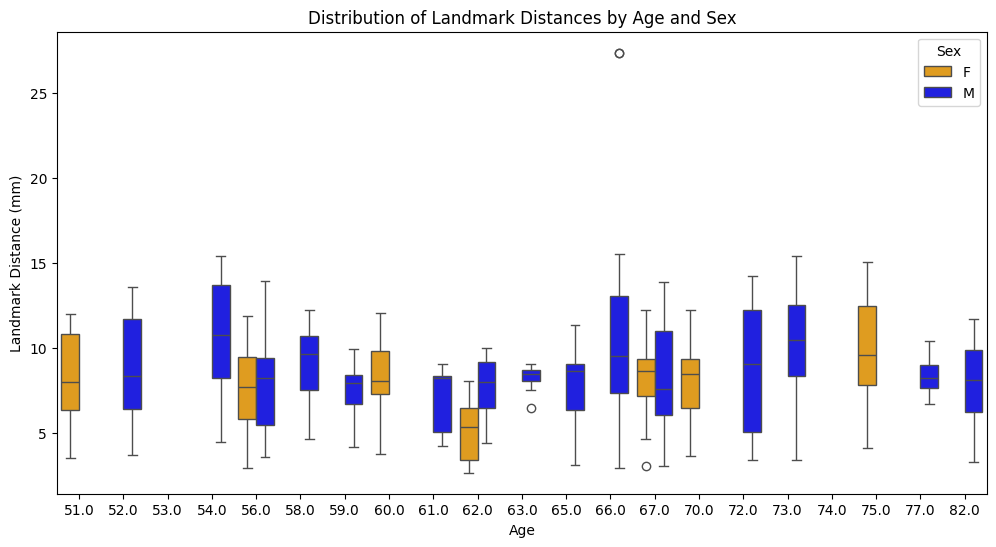

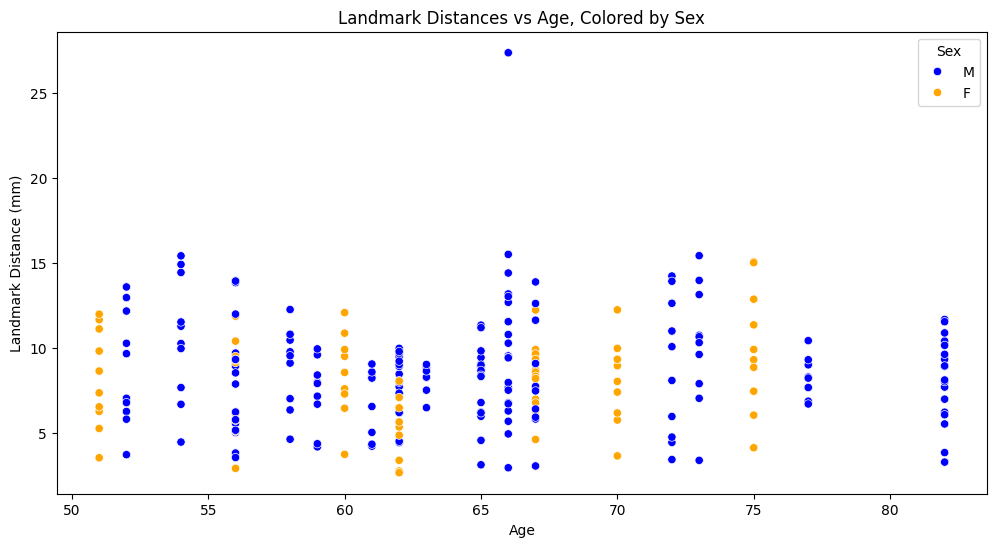

In [3]:
# Combine all CHUM dataframes
combined_chum_data = pd.concat(chum_data.values())

# Combine all CHUM dataframes
combined_chus_data = pd.concat(chus_data.values())

# Combine all HGJ dataframes
combined_hgj_data = pd.concat(hgj_data.values())

# Combine all HMR dataframes
combined_hmr_data = pd.concat(hmr_data.values())

# Combine all Olivetti dataframes
combined_olivetti_data = pd.concat(olivetti_data.values())

# Combine CHUM, HGJ, and Olivetti dataframes into one
combined_data = pd.concat([combined_chum_data, combined_chus_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Group by age and sex and calculate summary statistics
grouped_stats = combined_data.groupby(['Age', 'Sex'])['Distance_mm'].describe()

# Define a color palette with blue for males and orange for females
palette = {'M': 'blue', 'F': 'orange'}

# Box plot for distribution of distances by age and sex
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Distance_mm', hue='Sex', data=combined_data, palette=palette)
plt.title('Distribution of Landmark Distances by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Landmark Distance (mm)')
plt.legend(title='Sex')
plt.show()

# Scatter plot for relationship between age and landmark distances
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Distance_mm', hue='Sex', data=combined_data, palette=palette)
plt.title('Landmark Distances vs Age, Colored by Sex')
plt.xlabel('Age')
plt.ylabel('Landmark Distance (mm)')
plt.legend(title='Sex')
plt.show()


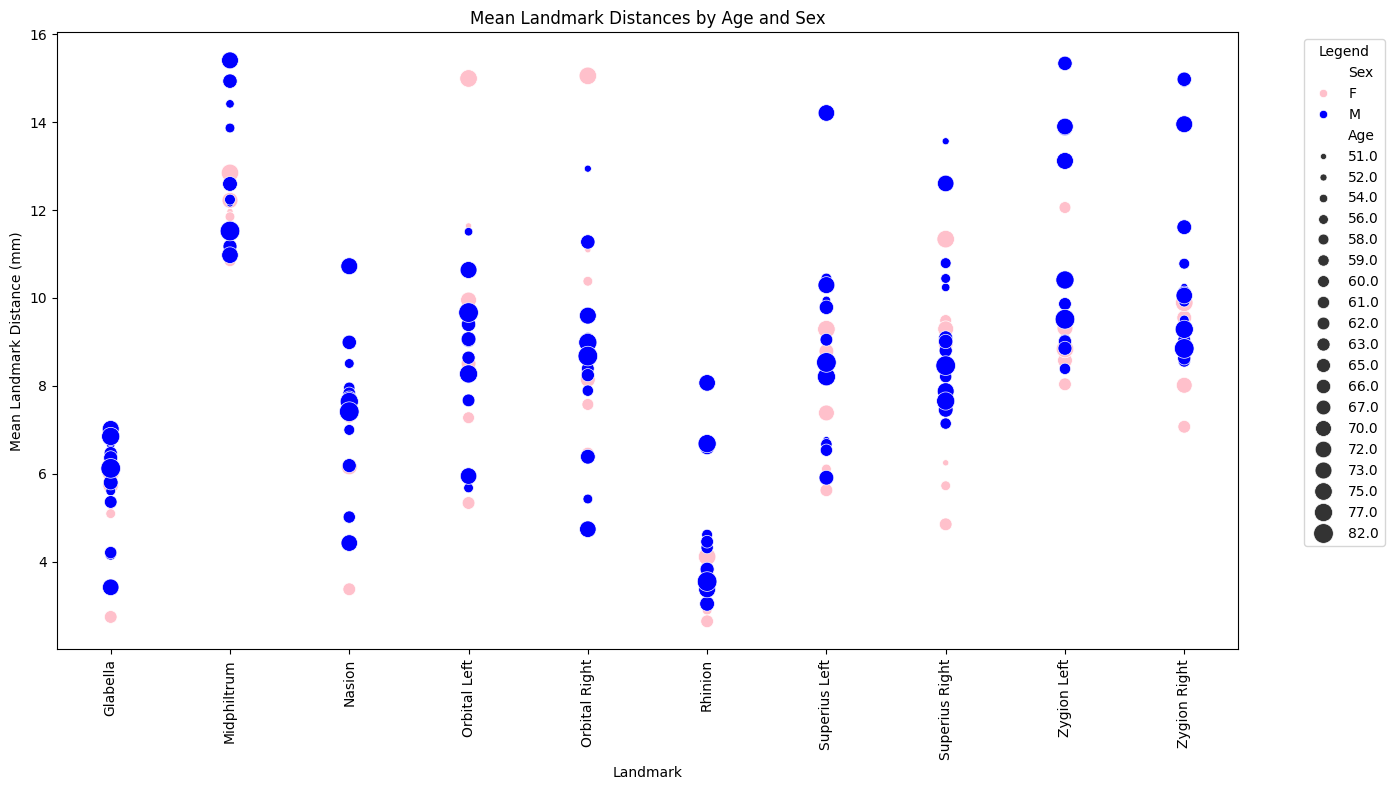

In [4]:
# Extract unique landmark points
landmarks = combined_data['Landmark'].unique()

# Calculate mean distances for each landmark
mean_distances = combined_data.groupby(['Landmark', 'Sex', 'Age']).agg({'Distance_mm': 'mean'}).reset_index()

# Create scatter plot with landmarks on the x-axis
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Landmark', y='Distance_mm', hue='Sex', size='Age', data=mean_distances, palette={'F': 'pink', 'M': 'blue'}, sizes=(20, 200), legend='full')
plt.title('Mean Landmark Distances by Age and Sex')
plt.xlabel('Landmark')
plt.ylabel('Mean Landmark Distance (mm)')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Regression

Number of unique patients: 47
Initial shape of combined data: (442, 45)
Unique values in 'Sex' column: ['M' 'F' nan]
Unique values in 'Age' column: [82. 56. 62. 67. 65. 70. 61. 59. 72. 77. 73. 66. 51. 63. 74. 53. 54. 52.
 75. 60. 58. nan]
Missing values before handling:
Landmark                                       80
Distance_mm                                    80
PatientID                                       0
Patient #                                     113
Sex                                           113
Age                                           113
Primary Site                                  113
T-stage                                       113
N-stage                                       113
M-stage                                       113
TNM group stage                               132
HPV status                                    387
Time – diagnosis to diagnosis (days)          113
Time – diagnosis to PET (days)                113
Time – diagnosis to CT sim (d

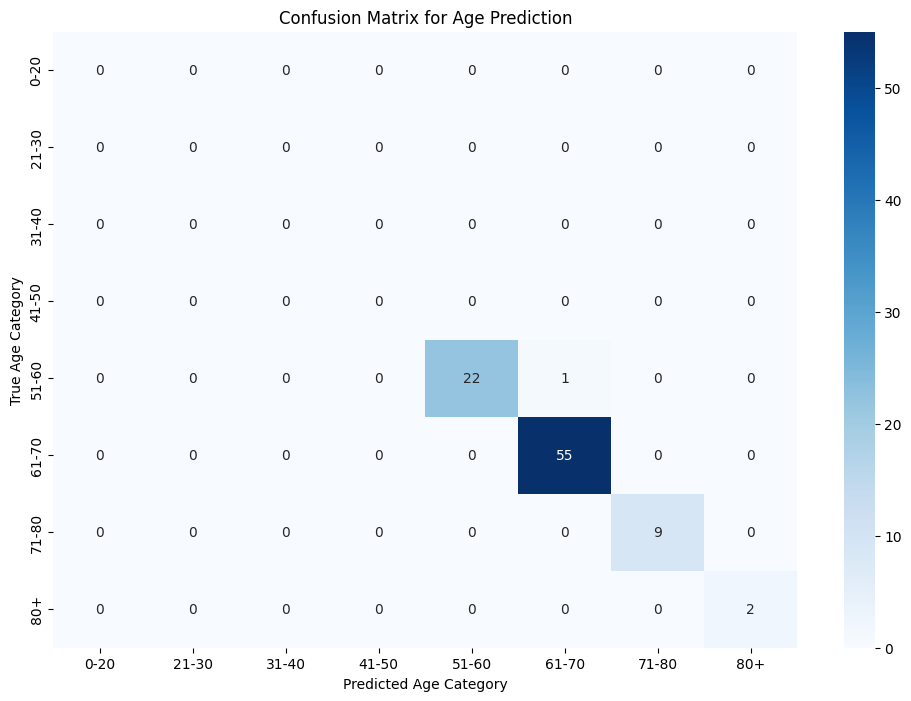

Sex Prediction - Accuracy: 1.0
Sex Prediction - Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



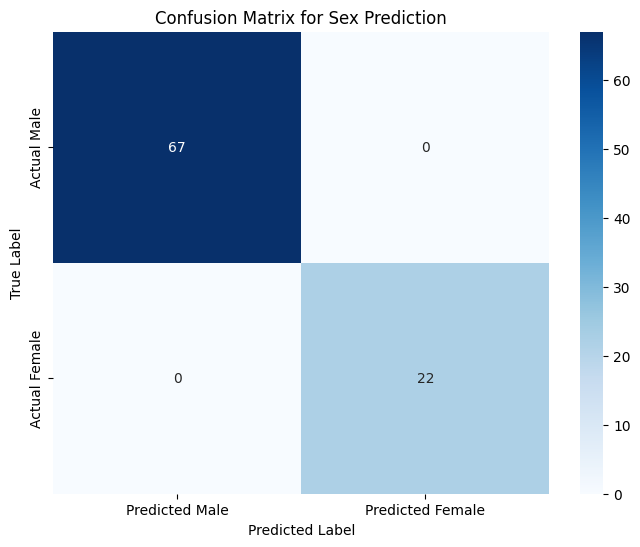

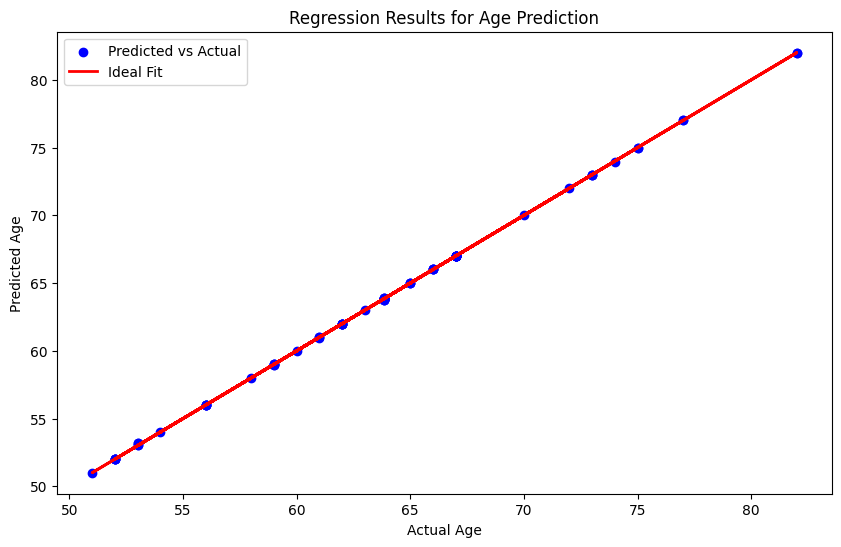

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Combine all dataframes into one
combined_data = pd.concat([combined_chum_data, combined_chus_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Check for duplicate rows
combined_data = combined_data.drop_duplicates()

# Verify the number of unique patients
print(f"Number of unique patients: {combined_data['PatientID'].nunique()}")

# Check the initial shape of the combined data
print("Initial shape of combined data:", combined_data.shape)

# Check for unique values in 'Sex' and 'Age' columns
unique_sex_values = combined_data['Sex'].unique()
unique_age_values = combined_data['Age'].unique()
print("Unique values in 'Sex' column:", unique_sex_values)
print("Unique values in 'Age' column:", unique_age_values)

# Check for missing values before handling
print("Missing values before handling:")
print(combined_data.isnull().sum())

# Handle missing values
combined_data['Sex'] = combined_data['Sex'].replace({'M': 0, 'F': 1})
combined_data['Sex'] = combined_data['Sex'].fillna(combined_data['Sex'].mode()[0])
combined_data['Age'] = combined_data['Age'].fillna(combined_data['Age'].mean())

# Re-check unique values after handling missing values
unique_sex_values_after = combined_data['Sex'].unique()
unique_age_values_after = combined_data['Age'].unique()
print("Unique values in 'Sex' column after handling:", unique_sex_values_after)
print("Unique values in 'Age' column after handling:", unique_age_values_after)

# Select features and target variables
features = combined_data.drop(columns=['PatientID', 'Age', 'Sex'])
target_age = combined_data['Age']
target_sex = combined_data['Sex']

# Split the data into training and test sets for age prediction
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(features, target_age, test_size=0.2, random_state=42)

# Split the data into training and test sets for sex prediction
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(features, target_sex, test_size=0.2, random_state=42)

# Verify the split data
print("Total rows before split:", combined_data.shape[0])
print("Rows in training set for age:", X_train_age.shape[0])
print("Rows in test set for age:", X_test_age.shape[0])
print("Rows in training set for sex:", X_train_sex.shape[0])
print("Rows in test set for sex:", X_test_sex.shape[0])

# Separate numeric and non-numeric features
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
non_numeric_features = features.select_dtypes(exclude=['int64', 'float64']).columns

# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for non-numeric features
non_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', non_numeric_transformer, non_numeric_features)])

# Age Prediction (Regression)
age_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

age_pipeline.fit(X_train_age, y_train_age)
y_pred_age = age_pipeline.predict(X_test_age)

mse = mean_squared_error(y_test_age, y_pred_age)
r2 = r2_score(y_test_age, y_pred_age)
print(f'Age Prediction - Mean Squared Error: {mse}')
print(f'Age Prediction - R-squared: {r2}')

# Define age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, np.inf]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

# Categorize actual and predicted ages
y_test_age_binned = pd.cut(y_test_age, bins=age_bins, labels=age_labels)
y_pred_age_binned = pd.cut(y_pred_age, bins=age_bins, labels=age_labels)

# Calculate accuracy and classification report for age prediction
age_accuracy = accuracy_score(y_test_age_binned, y_pred_age_binned)
age_classification_rep = classification_report(y_test_age_binned, y_pred_age_binned)
print(f'Age Prediction - Accuracy: {age_accuracy}')
print('Age Prediction - Classification Report:')
print(age_classification_rep)

# Calculate confusion matrix for age prediction
conf_matrix_age = confusion_matrix(y_test_age_binned, y_pred_age_binned, labels=age_labels)

# Plot confusion matrix for age prediction
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_age, annot=True, fmt='d', cmap='Blues', xticklabels=age_labels, yticklabels=age_labels)
plt.title('Confusion Matrix for Age Prediction')
plt.xlabel('Predicted Age Category')
plt.ylabel('True Age Category')
plt.show()

# Sex Prediction (Classification)
sex_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

sex_pipeline.fit(X_train_sex, y_train_sex)
y_pred_sex = sex_pipeline.predict(X_test_sex)

accuracy = accuracy_score(y_test_sex, y_pred_sex)
classification_rep = classification_report(y_test_sex, y_pred_sex)
print(f'Sex Prediction - Accuracy: {accuracy}')
print('Sex Prediction - Classification Report:')
print(classification_rep)

# Calculate confusion matrix for sex prediction
conf_matrix = confusion_matrix(y_test_sex, y_pred_sex)

# Plot confusion matrix for sex prediction
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Male', 'Predicted Female'], yticklabels=['Actual Male', 'Actual Female'])
plt.title('Confusion Matrix for Sex Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_age, y_pred_age, color='blue', label='Predicted vs Actual')
plt.plot(y_test_age, y_test_age, color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Regression Results for Age Prediction')
plt.legend()
plt.show()


Sex Prediction - Accuracy: 0.5
Sex Prediction - Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         6
         1.0       0.00      0.00      0.00         2

    accuracy                           0.50         8
   macro avg       0.33      0.33      0.33         8
weighted avg       0.50      0.50      0.50         8

Age Bin Prediction - Accuracy: 0.375
Age Bin Prediction - Classification Report:
              precision    recall  f1-score   support

       51-60       0.00      0.00      0.00         2
       61-70       0.60      0.60      0.60         5
       71-80       0.00      0.00      0.00         1

    accuracy                           0.38         8
   macro avg       0.20      0.20      0.20         8
weighted avg       0.38      0.38      0.38         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


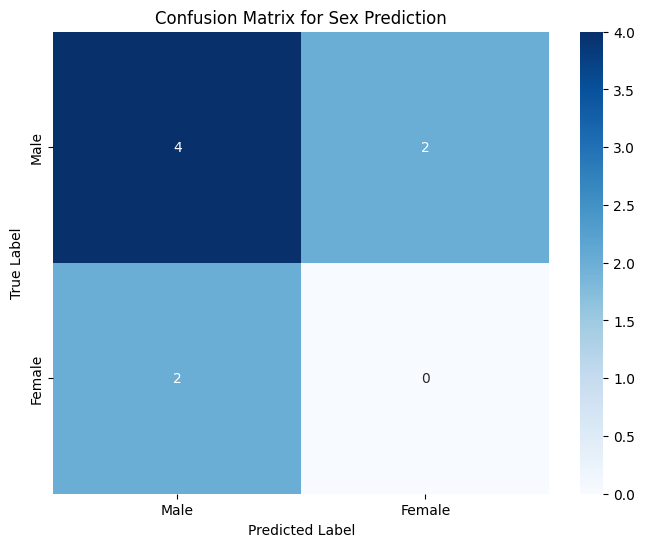

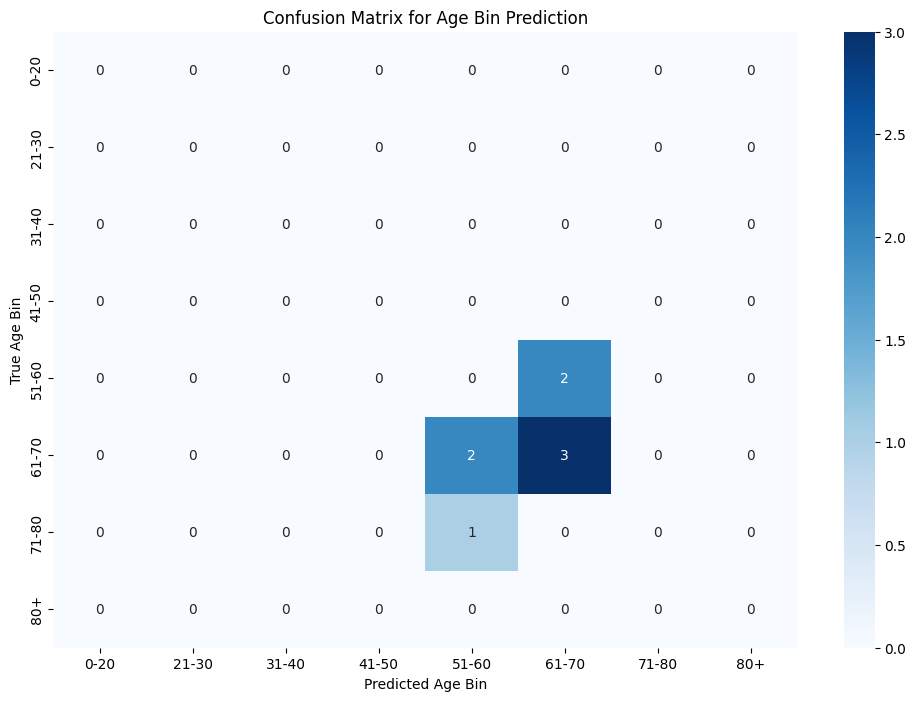

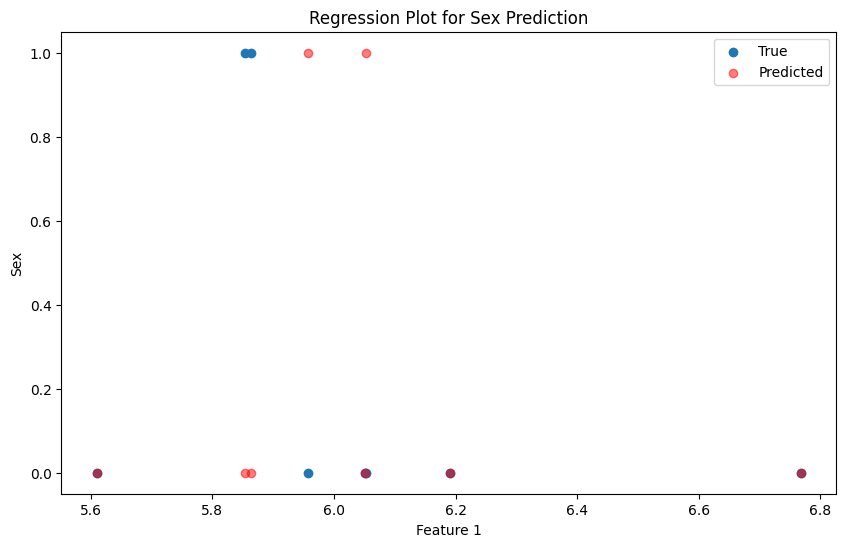

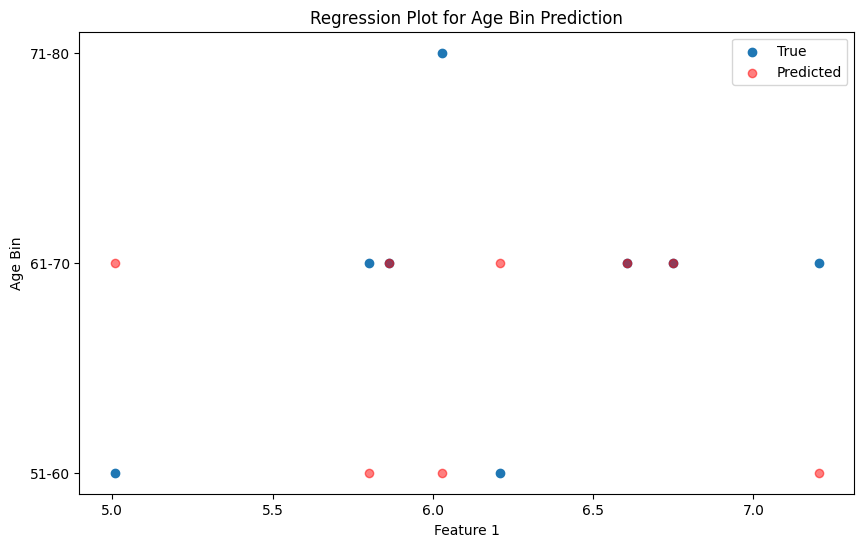

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is already defined and contains the necessary data
# Combine all dataframes into one
# combined_data = pd.concat([combined_chum_data, combined_chus_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Check for duplicate rows
combined_data = combined_data.drop_duplicates()

# Group by PatientID and aggregate landmark distances into a single row per patient
patient_landmarks = combined_data.pivot_table(index='PatientID', columns='Landmark', values='Distance_mm')

# Reset the index to make 'PatientID' a column
patient_landmarks.reset_index(inplace=True)

# Merge aggregated landmarks with age and sex
patient_info = combined_data[['PatientID', 'Age', 'Sex']].drop_duplicates()
patient_data = patient_landmarks.merge(patient_info, on='PatientID')

# Encode sex
patient_data['Sex'] = patient_data['Sex'].replace({'M': 0, 'F': 1})

# Define age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, np.inf]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

# Categorize age
patient_data['AgeBin'] = pd.cut(patient_data['Age'], bins=age_bins, labels=age_labels)

# Handle missing values in the target variables
patient_data['Sex'] = patient_data['Sex'].fillna(patient_data['Sex'].mode()[0])
patient_data['AgeBin'] = patient_data['AgeBin'].fillna(patient_data['AgeBin'].mode()[0])

# Select features and target variables
features = patient_data.drop(columns=['PatientID', 'Age', 'Sex', 'AgeBin'])
target_sex = patient_data['Sex']
target_age_bin = patient_data['AgeBin']

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Use stratified sampling to ensure both male and female patients are present in both training and test sets
X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(features_imputed, target_sex, test_size=0.2, random_state=0, stratify=target_sex)
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(features_imputed, target_age_bin, test_size=0.2, random_state=0, stratify=target_age_bin)

# Train a model for sex prediction
sex_model = RandomForestClassifier(random_state=0)
sex_model.fit(X_train_sex, y_train_sex)
y_pred_sex = sex_model.predict(X_test_sex)

# Evaluate the sex prediction model
sex_accuracy = accuracy_score(y_test_sex, y_pred_sex)
sex_report = classification_report(y_test_sex, y_pred_sex)
print(f'Sex Prediction - Accuracy: {sex_accuracy}')
print('Sex Prediction - Classification Report:')
print(sex_report)

# Train a model for age bin prediction
age_model = RandomForestClassifier(random_state=0)
age_model.fit(X_train_age, y_train_age)
y_pred_age = age_model.predict(X_test_age)

# Evaluate the age bin prediction model
age_accuracy = accuracy_score(y_test_age, y_pred_age)
age_report = classification_report(y_test_age, y_pred_age)
print(f'Age Bin Prediction - Accuracy: {age_accuracy}')
print('Age Bin Prediction - Classification Report:')
print(age_report)

# Plot confusion matrix for sex prediction
conf_matrix_sex = confusion_matrix(y_test_sex, y_pred_sex)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sex, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.title('Confusion Matrix for Sex Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for age bin prediction
conf_matrix_age = confusion_matrix(y_test_age, y_pred_age, labels=age_labels)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_age, annot=True, fmt='d', cmap='Blues', xticklabels=age_labels, yticklabels=age_labels)
plt.title('Confusion Matrix for Age Bin Prediction')
plt.xlabel('Predicted Age Bin')
plt.ylabel('True Age Bin')
plt.show()

# Choose the first feature for visualization
feature_index = 0

# Plot regression line with points for Sex prediction
plt.figure(figsize=(10, 6))
plt.scatter(X_test_sex[:, feature_index], y_test_sex, label='True')
plt.scatter(X_test_sex[:, feature_index], y_pred_sex, color='red', label='Predicted', alpha=0.5)
plt.title('Regression Plot for Sex Prediction')
plt.xlabel(f'Feature {feature_index + 1}')
plt.ylabel('Sex')
plt.legend()
plt.show()

# Plot regression line with points for Age Bin prediction
plt.figure(figsize=(10, 6))
plt.scatter(X_test_age[:, feature_index], y_test_age, label='True')
plt.scatter(X_test_age[:, feature_index], y_pred_age, color='red', label='Predicted', alpha=0.5)
plt.title('Regression Plot for Age Bin Prediction')
plt.xlabel(f'Feature {feature_index + 1}')
plt.ylabel('Age Bin')
plt.legend()
plt.show()


In [30]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Assuming the data is already loaded into the following variables
# combined_chum_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data

# Combine all dataframes into one
combined_data = pd.concat([combined_chum_data, combined_chus_data, combined_hgj_data, combined_hmr_data, combined_olivetti_data], ignore_index=True)

# Handle missing values and encode 'Sex' column
combined_data['Sex'] = combined_data['Sex'].replace({'M': 0, 'F': 1})
combined_data['Sex'] = combined_data['Sex'].fillna(combined_data['Sex'].mode()[0])
combined_data['Age'] = combined_data['Age'].fillna(combined_data['Age'].mean())

combined_data = combined_data.dropna(subset=['Landmark'])
combined_data['Landmark'] = combined_data['Landmark'].astype(str)

# Extract unique landmarks
landmark_cols = combined_data['Landmark'].unique()

# Pivot the data to have one row per PatientID with landmark values as columns
landmark_df = combined_data.pivot_table(index='PatientID', columns='Landmark', values='Distance_mm').reset_index()

# Identify landmarks that need to be averaged (those with 'right' and 'left' versions)
landmarks_to_average = {}
for landmark in landmark_cols:
    base_name = landmark.replace("Right", "").replace("Left", "").strip()
    if base_name not in landmarks_to_average:
        if any(f"{base_name} Right" in col for col in landmark_cols) and any(f"{base_name} Left" in col for col in landmark_cols):
            landmarks_to_average[base_name] = [f"{base_name} Right", f"{base_name} Left"]

# Calculate the average for 'right' and 'left' landmarks
for base_name, columns in landmarks_to_average.items():
    landmark_df[base_name] = landmark_df[columns].mean(axis=1)
    landmark_df = landmark_df.drop(columns, axis=1)

# Merge with demographic data
patient_info = combined_data[['PatientID', 'Age', 'Sex']].drop_duplicates()
final_df = pd.merge(landmark_df, patient_info, on='PatientID')

# Prepare data for correlation analysis
results = {'Landmark': [], 'Age_Corr': [], 'Gender_M_Corr': [], 'Gender_F_Corr': []}

for landmark in final_df.columns:
    if landmark not in ['PatientID', 'Age', 'Sex']:
        y = final_df[landmark].dropna()  # Drop NA values for the specific landmark
        X_landmark = final_df.loc[y.index, ['Age', 'Sex']]  # Select corresponding X values

        age_corr, _ = pearsonr(X_landmark['Age'], y)
        gender_m_corr, _ = pearsonr(X_landmark['Sex'] == 0, y)
        gender_f_corr, _ = pearsonr(X_landmark['Sex'] == 1, y)

        results['Landmark'].append(landmark)
        results['Age_Corr'].append(age_corr)
        results['Gender_M_Corr'].append(gender_m_corr)
        results['Gender_F_Corr'].append(gender_f_corr)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save results to a CSV file
results_df.to_csv('landmark_pearson_correlation_results.csv', index=False)


['Glabella' 'Nasion' 'Orbital Right' 'Orbital Left' 'Superius Right'
 'Superius Left' 'Zygion Right' 'Zygion Left' 'Rhinion' 'Midphiltrum']
      Landmark  Age_Corr  Gender_M_Corr  Gender_F_Corr
0     Glabella  0.159088       0.185812      -0.185812
1  Midphiltrum -0.027694       0.361174      -0.361174
2       Nasion  0.048692       0.223551      -0.223551
3      Rhinion  0.169751       0.233098      -0.233098
4      Orbital  0.111424      -0.199067       0.199067
5     Superius  0.103742       0.139300      -0.139300
6       Zygion  0.020433       0.163612      -0.163612
